### Ultimas instalaciones antes de ejecutar programas 

Para poder instalar lo que sea necesario puedo utilizar pip que es el gestor de paquetes para Python que facilita la instalación y gestión de bibliotecas de software:

    - conda install pip 


Primero y desde el terminal por si pide respuesta del usuario, instalo la última versión de qiskit: 

    - pip install  qiskit --upgrade

In [ ]:
# Reconoce qiskit y la libreria QuantumCircuit después de instalarlo
from qiskit import QuantumCircuit
# QiskitRuntimeService sirve para 
from qiskit_ibm_runtime import QiskitRuntimeService 


ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

No reconoce qiskit_ibm_runtime, debo instalarla

    - pip install qiskit qiskit-ibm-runtime

In [3]:
%pip install qiskit qiskit-ibm-runtime

  Using cached requests_ntlm-1.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached PyJWT-2.10.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.7 MB/s  0:00:00 eta 0:00:01
Using cached PyJWT-2.10.1-py3-none-any.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s  0:00:00m eta 0:00:01
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached requests_ntlm-1.3.0-py3-none-any.whl (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.6 MB/s  0:00:006m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [qiskit-ibm-runtime]iskit-ibm-runtime]es]
Note: you may need to restart the kernel to use updated packages.


## 1.- Conectamos con el servicio. 

Leerá las credenciales de nuestro fichero local

Consultar el ejercicio 7 ConexionIBMQPU y el documento pdf Creación Cuenta IBM

https://chatgpt.com/c/68b738a1-0ab0-8321-b94a-10d54f7902c5

Aplicar lo que dice chatgpt, parece que estaba ejecutanto un versión de qiskit antigua



In [ ]:
%pip install qiskit qiskit-ibm-runtime

In [4]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
print("Cuenta activa:", service.active_account())

Cuenta activa: {'channel': 'ibm_cloud', 'url': 'https://cloud.ibm.com', 'token': '8W5eNFyYpAYa0cbp_sX9BNnehgMBFZvPkE7z1bYOcE6m', 'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/5a966b2af42a46119aef12fa13a74404:3bd110f9-416f-4c8d-b8f0-0a28e6f898b0::', 'verify': True, 'private_endpoint': False}


Como vemos, ya tenemos especificación del servicio de conexión 

Veamos que backends tengo disponibles en mi cuenta IBM

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Cargar credenciales guardadas en el fichero apikey&crn.json
service = QiskitRuntimeService()

# Ver qué backends tienes disponibles
print(service.backends())


[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]


Veamos una conexión real

In [8]:
# QiskitRuntimeService 
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# 1) Cargar el servicio (credenciales ya guardadas con save_account)
service = QiskitRuntimeService()

# 2) Elegir backend real
backend = service.backend("ibm_brisbane")

# 3) Circuito de prueba (Bell)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# 4) Transpilar al ISA del backend (recomendado)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

# 5) Crear Sampler V2 en "job mode" pasando el backend en 'mode'
sampler = Sampler(mode=backend)  # <-- sin 'service' ni 'backend' kwargs

# 6) Ejecutar (shots se pasa en run)
job = sampler.run([isa_circuit], shots=1024)  # firmas: run(pubs, *, shots=None)
result = job.result()

# 7) Obtener los counts
counts = result[0].data.meas.get_counts()
print(counts)


{'00': 485, '11': 476, '01': 44, '10': 19}


Se ha conectado con IBM y ha utilizado ibm_brisbane

## 2.- Creamos/Mapeamos programa cuántico simple

Los cuatro pasos para escribir un programa cuántico con patrones Qiskit son:

    - Mapear el problema a un formato cuántico nativo.

    - Optimizar los circuitos y operadores.

    - Ejecutar utilizando una función primitiva cuántica o un job

    - Analizar los resultados.

**Mapeamos** o modelizamos un problema de la realidad en un circuito cuántico

En un programa cuántico, los circuitos cuánticos son el formato nativo para representar instrucciones cuánticas, y los operadores representan los observables que se van a medir. Al crear un circuito, normalmente se crea un nuevo objeto QuantumCircuit y luego se le añaden instrucciones secuencialmente.

La siguiente celda de código crea un circuito que produce un estado de Bell, un estado en el que dos cúbits están completamente entrelazados.

NOTA: En los primeros ejercicios de ejemplo como el 2.- Entrelazamiento2qubits.ipynb nos muestra como ejecutar el mapeo, el circuito cuántico mediante un simulador, sin necesidad de utilizar una QPU física. Ahora veremos como ejecutarlo en una QPU real de la plataforma IBM-QUANTUM. 

In [ ]:
%pip install matplotlib
# es necesario la instalación de  esta librería para poder "graficar" el  circuito siguiente. 

In [ ]:
%pip install pylatexenc
# también es necesaria esta, en cada ejecución con error nos dice si falta alguna libreria

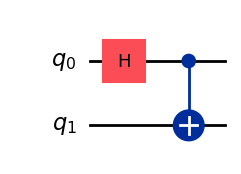

In [1]:
# QuantumCircuit permite crear circuitos cuánticos
# y realizar operaciones cuánticas sobre ellos.
from qiskit import QuantumCircuit

# SparsePauliOp permite trabajar con operadores de Pauli dispersos.
# Esto significa que solo se almacenan los términos no nulos de un operador de Pauli,
# lo que es útil para circuitos cuánticos grandes y complejos.
from qiskit.quantum_info import SparsePauliOp

# Un transpiler es una herramienta que optimiza y transforma circuitos cuánticos
# para que sean adecuados para la ejecución en hardware cuántico específico.
# generate_preset_pass_manager crea un gestor de pases predefinido
# que aplica una serie de transformaciones y optimizaciones al circuito para mejorar su rendimiento.
from qiskit.transpiler import generate_preset_pass_manager

# EstimatorV2 es una clase que permite estimar valores esperados de operadores cuánticos
# utilizando el servicio de IBM Quantum Runtime. Es una versión mejorada del Estimator original.
# Proporciona una interfaz más eficiente y flexible para realizar estimaciones en circuitos cuánticos.
# Cuando decimos estimar, nos referimos a calcular el valor esperado de un operador cuántico
# dado un estado cuántico. Esto es fundamental en la computación cuántica para obtener resultados de 
# mediciones en circuitos cuánticos.
# ES UNA DE LAS FORMAS DE TRABAJAR CON LOS DATOS DE IBM QUANTUM.
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Creamos un circuito cuántico con 2 qubits.
qc = QuantumCircuit(2)
 
# Colocamos una compuerta Hadamard en el qubit 0.
# La compuerta Hadamard crea una superposición de estados.
qc.h(0)
 
# Ponemos una compuerta CNOT con control en el qubit 0 y objetivo en el qubit 1.
qc.cx(0, 1)
 
# draw() es un método que permite visualizar el circuito cuántico.
# "mpl" indica que queremos dibujar el circuito usando Matplotlib.
# Esto es útil para entender la estructura del circuito y las operaciones que se realizan.
qc.draw("mpl")

## 3.- Indicamos nuestros observables del circuito

**¿Formas de obtener los datos al ejecutar un circuito cuántico?**

Al crear circuitos cuánticos, también debe considerar el tipo de datos que desea obtener tras la ejecución. 

Qiskit ofrece dos maneras de obtener datos: 

    - puede obtener una distribución de probabilidad para un conjunto de cúbits que desee medir 
  
    - o puede obtener el valor esperado de un observable. 
  
Podemos medir el circuito de una de estas dos maneras con las primitivas de Qiskit (explicadas en detalle en el paso 3 ).

La primera consiste en obtener los datos y generar un histograma. 

La segunda hace uso de las primitivas. Estas tratan los datos brutos y nos facilitan lo que nos interesa más. 

**Prearamos un conjunto de seis observables**

En IBM Qiskit, un observable es un objeto matemático (representado por un operador hermítico) que corresponde a una magnitud física que se puede medir en un sistema cuántico.

En mecánica cuántica, los observables son operadores hermíticos porque sus valores propios (autovalores) son reales, lo cual coincide con el hecho de que las mediciones físicas siempre producen resultados reales (energía, spin, etc.).

En Qiskit los observables suelen representarse como operadores de Pauli o combinaciones lineales de ellos, usando por ejemplo:

Pauli("Z") → el observable σ<sub>z</sub>

Pauli("X") → el observable σ<sub>x</sub>

SparsePauliOp(["ZZ", "XI"]) → una combinación de observables

In [2]:
# Conjunto de etiquetas de observables que se van a medir.
# Estos observables son combinaciones de operadores de Pauli (I, X, Y, Z)
# que se utilizan para medir diferentes propiedades del estado cuántico.
# IZ significa que el primer qubit es medido con Z y el segundo con I,
# IX significa que el primer qubit es medido con I y el segundo con X,
# ZI significa que el primer qubit es medido con Z y el segundo con I,
# XI significa que el primer qubit es medido con X y el segundo con I,
# ZZ significa que ambos qubits son medidos con Z,
# XX significa que ambos qubits son medidos con X.
# Estos observables son importantes para entender las correlaciones y propiedades del sistema cuántico.

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]


## 4.-Optimizamos: convertimos en un circuito ISA

Al ejecutar circuitos en un dispositivo, es importante optimizar el conjunto de instrucciones que contiene y minimizar su profundidad total (aproximadamente el número de instrucciones). Esto garantiza la obtención de los mejores resultados posibles al reducir los efectos del error y el ruido. Además, las instrucciones del circuito deben cumplir con la Arquitectura del Conjunto de Instrucciones (ISA instructions set arquitecture) del dispositivo backend y considerar las puertas base y la conectividad de cúbits del dispositivo.

El siguiente código instancia un dispositivo real al que se le envía un trabajo y transforma el circuito y los observables para que coincidan con la ISA de ese backend. Requiere que ya haya guardado sus credenciales, es decir, que ya haya hecho una conexión identificándome con apikey y crn. 

https://quantum.cloud.ibm.com/docs/es/guides/transpile#instruction-set-architecture

In [4]:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService()
# ya nos conectamos al servicio de IBM Quantum Runtime con las credenciales guardadas al comienzo de 
# este cuaderno.

# Seleccionamos el backend más adecuado para ejecutar nuestro circuito.
# El método least_busy busca el backend menos ocupado que esté operativo y no sea un simulador.
# Esto es útil para asegurarnos de que nuestro trabajo se ejecute lo más rápido posible.
# simulator=False indica que no queremos un simulador, sino un backend real.
# operational=True indica que solo consideramos backends que están operativos.
# Esto es importante para evitar errores al enviar trabajos a backends que no están disponibles.
backend = service.least_busy(simulator=False, operational=True)
 
# Convierte a un circuito ISA y observables mapeados en diseño.
# pm contiene un gestor de pases predefinido que aplica optimizaciones y transformaciones al circuito.
# backend es el backend seleccionado donde se ejecutará el circuito.
# optimization_level=1 indica el nivel de optimización que se aplicará al circuito.
# Un nivel de optimización más alto puede mejorar el rendimiento del circuito,
# pero también puede aumentar el tiempo de compilación.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

# Transforma el circuito y los observables para que coincidan con la ISA del backend.
# Esto es necesario para que el circuito y los observables sean compatibles con las instrucciones del backend
# y puedan ejecutarse correctamente en el hardware cuántico.
isa_circuit = pm.run(qc)

# dibuja el circuito cuántico transformado utilizando Matplotlib.
# Esto nos permite visualizar cómo se ha modificado el circuito para adaptarse a la ISA del backend.
# idle_wires=False indica que no queremos mostrar los qubits inactivos en el circuito.
# Esto es útil para simplificar la visualización y centrarnos en las operaciones relevantes.
# Esto es útil para entender cómo se ha optimizado el circuito y qué operaciones se han realizado
# para adaptarlo al backend específico.
isa_circuit.draw("mpl", idle_wires=False)

NameError: name 'service' is not defined

## Habrá que analizar esta optimización de arriba

**Antes debería ponerme al día en algebra matricial cuántica.**

Revisar la optimización anterior puerta por puerta.


## 5.-Ejecutamos: usando primitivas cuánticas

Las computadoras cuánticas **pueden producir resultados aleatorios, por lo que se suele recopilar una muestra de las salidas ejecutando el circuito varias veces**. 

Se puede estimar el valor del observable utilizando la clase Estimator. **Estimator** es una de dos primitivas ; la otra es **Sampler**, que puede utilizarse para obtener datos de una computadora cuántica. 

**Primitivas:**

https://quantum.cloud.ibm.com/docs/guides/get-started-with-primitives

    - Estimator
  
    - Sampler
  

Estos objetos poseen un método run() que ejecuta la selección de circuitos, observables y parámetros (si corresponde), mediante un bloque unificado de primitivas (PUB).

https://quantum.cloud.ibm.com/docs/guides/primitives#sampler

**Ejecución**

En el código de debajo se muestra como ejecutar mediante primitivas. 

De las dos que conocemos elegimos Estimator. 

La otra se llama Sampler

In [ ]:
# Generamos una instancia de EstimatorV2 para estimar los valores esperados de los observables.
# EstimatorV2 es una clase que permite realizar estimaciones de valores esperados de operadores
# cuánticos utilizando el servicio de IBM Quantum Runtime.
# mode=backend indica que queremos utilizar el backend seleccionado para las estimaciones.
# Esto es importante porque cada backend puede tener diferentes capacidades y restricciones,
# y queremos asegurarnos de que nuestras estimaciones se realicen en el contexto adecuado.

estimator = Estimator(mode=backend)

# Le indicamos al estimador que queremos utilizar un nivel de resiliencia 1.
# Esto significa que el estimador aplicará ciertas técnicas para mejorar la precisión de las estimaciones
# y reducir el impacto de errores en el hardware cuántico.
# Un nivel de resiliencia más alto puede mejorar la calidad de las estimaciones,
# pero también puede aumentar el tiempo de ejecución y los recursos necesarios.
# default_shots=5000 indica que queremos realizar 5000 disparos (shots)
# para cada estimación. Los disparos son repeticiones del circuito cuántico
# que se utilizan para obtener una distribución de resultados y calcular el valor esperado.
# Un mayor número de disparos puede mejorar la precisión de las estimaciones,
# pero también aumenta el tiempo de ejecución y los recursos necesarios.
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
# apply_laoyout aplica el diseño del circuito ISA a los observables.
# Esto es necesario para que los observables sean compatibles con el circuito transformado
# y puedan medirse correctamente en el hardware cuántico.
# Esto asegura que los observables se alineen con las operaciones del circuito
# y se midan en los qubits correctos.
# Esto es importante para obtener resultados precisos y significativos de las mediciones.
# mapped_observables es una lista de observables transformados que se aplican al diseño
# del circuito ISA. Cada observable se aplica al diseño del circuito para asegurarse
# de que las mediciones se realicen en los qubits correctos y se alineen
# con las operaciones del circuito.
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# Un pub con un circuito ISA y observables mapeados se envía al estimador para su ejecución.
# run() es un método que envía el circuito y los observables al backend para su ejecución.
# El resultado es un objeto Job que contiene información sobre el trabajo enviado,
# incluyendo el ID del trabajo, el estado del trabajo y los resultados de las mediciones.
# Este objeto Job se puede utilizar para recuperar los resultados más tarde.
# El método run() toma una lista de tuplas, donde cada tupla contiene el circuito
# y los observables que se van a medir. 
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d2gqmseactes73f4l26g


## 6.- Recuperar información tras ejecutar el trabajo

Tras enviar un trabajo, podemos hacer dos cosas: 

-  esperar a que se complete en su instancia de Python actual 
  
-  o usar job_id para recuperar los datos posteriormente. 
   
(Consulte la sección sobre la recuperación de trabajos para obtener más información).

Una vez completado el trabajo, examine su salida mediante el atributo result().

https://quantum.cloud.ibm.com/docs/es/guides/save-jobs

In [7]:
# job.result() es un método que devuelve el resultado del trabajo enviado.
# Este método espera a que el trabajo se complete y luego devuelve un objeto Result
# que contiene los resultados de las mediciones realizadas en el circuito cuántico.
# Este es el resultado de todo el envío. Enviaste una  PUB, que es un tipo de trabajo,
# job_result() contiene un resultado interno (y algunos metadatos propios).
job_result = job.result()

# job.result()[0] es un método que devuelve el primer resultado del trabajo enviado.
# En este caso, el trabajo enviado fue una PUB que contenía un circuito y seis observables.
# Por lo tanto, job.result()[0] devuelve el resultado de la ejecución del circuito
# y las mediciones de los seis observables.
# Solo del primer trabajo, aunque en este caso solo enviamos uno. 
pub_result = job.result()[0]

## 7.- Analizar:  los resultados 

Utilizamos la primitiva EstimatorV2 que ya nos devuelve datos calculados sobre los obtenidos. 
En este caso obtenemos directamente los valores esperados, así como las desviaciones estandar. 

In [11]:
# Dibujamos el resultado de los datos obtenidos por la PUB o el único trabajo enviado.
 
from matplotlib import pyplot as plt

# pub_result es un objeto con varios atributos que contienen los resultados de las mediciones.
# data.evs contiene los valores esperados de los observables medidos.
# Estos valores son el resultado de las estimaciones realizadas por el estimador
values = pub_result.data.evs

# data.stds contiene las desviaciones estándar de los valores esperados,
# lo que indica la incertidumbre asociada a las mediciones.
errors = pub_result.data.stds

# Esta es la ventaja  de utilizar la primitiva EstimatorV2,
# ya que nos proporciona tanto los valores esperados como las desviaciones estándar.
# De recoger los datos brutos, deberíamos calcularlos nosotros mismos



**Dibujamos los datos obtenidos:**

El valor de cada una de las  etiquetas. 

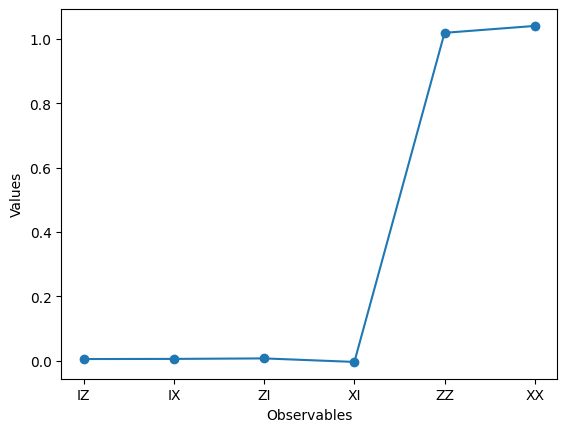

In [12]:
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

## 8.- No ejecutar en backen real. Usar 

Al ejecutar su programa cuántico en un dispositivo real, la carga de trabajo debe esperar en una cola antes de ejecutarse. 

Para ahorrar tiempo, puede usar el siguiente código para ejecutar esta pequeña carga de trabajo en **fake_provider** con el modo de **prueba local** de Qiskit Runtime. 

https://quantum.cloud.ibm.com/docs/es/api/qiskit-ibm-runtime/fake-provider

El módulo de proveedor falso contiene proveedores falsos y clases de backends falsos. Estos backends falsos están diseñados para imitar el comportamiento de los sistemas IBM Quantum mediante instantáneas del sistema. Estas instantáneas contienen información importante sobre el sistema cuántico, como el mapa de acoplamiento, las puertas de base y las propiedades de los cúbits (T1, T2, tasa de error, etc.), que resultan útiles para probar el transpilador y realizar simulaciones con ruido del sistema.

Esto solo es posible para circuitos pequeños. 

**Ejecutaríamos los pasos del 2, 3  y luego el 8 simulador:**

Para comprobarlo reiniciamos el kernel y luego ejecutamos el 2 el 3 y el 8 simulador. 

In [ ]:
# Código alternativo que nos permite ejecutar en un simulador en lugar de un backend real.
# qiskit_ibm_runtime tiene el método fake_provider que permite invocar una imagen de un backend simulado.
# Esto es útil para pruebas y desarrollo sin necesidad de utilizar un backend real. 
# Hay varios backends simulados disponibles, como FakeAlmadenV2. Cada uno representa una imagen 
# de un computador cuántico físico.
# Construimos el objeto backend y se lo pasasmos al EstimatorV2.
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()
estimator = Estimator(backend)
 
# Convertimos a un circuito ISA y observables mapeados en diseño.
# pm contiene un gestor de pases predefinido que aplica optimizaciones y transformaciones al circuito.
# backend es el backend simulado seleccionado donde se ejecutará el circuito. 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
# el resto es lo mismo que se hace en el paso 4
isa_circuit = pm.run(qc)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]
print(pub_result.data.evs)

[0.04541016 0.07275391 0.12451172 0.1640625  0.80175781 0.76220703]


**También podemos dibujarlo**

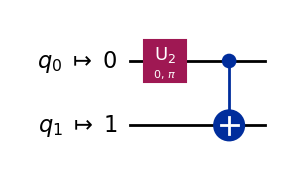

In [4]:
isa_circuit.draw("mpl", idle_wires=False)

## 9.- Analizamos los resultados

El paso de análisis suele ser donde se posprocesan los resultados mediante, por ejemplo, la mitigación de errores de medición o la extrapolación de ruido cero (ZNE). Puede introducir estos resultados en otro flujo de trabajo para un análisis más profundo o preparar un gráfico de los valores clave y los datos. En general, este paso es específico para cada problema. Para este ejemplo, grafique cada uno de los valores esperados medidos para nuestro circuito.

**Obtenemos los resultados con job a través de pub_result**

Se accede a los valores esperados y las desviaciones estándar de los observables especificados en Estimator mediante los atributos PubResult.data.evs y PubResult.data.stds del resultado del trabajo.

**Si quisieramos obtener los resultados mediante Sampler** otra forma de obtener los resultados entonces: 
Utilizamos la función **PubResult.data.meas.get_counts()**, que devolverá un diccionario de mediciones en forma de cadenas de bits como claves y recuentos como sus valores correspondientes. Para obtener más información, consulte Introducción a Sampler:

https://quantum.cloud.ibm.com/docs/es/guides/get-started-with-primitives#get-started-with-sampler

**Una manera de analizar los resultados es dibujarlos**

En función de los datos obtenidos

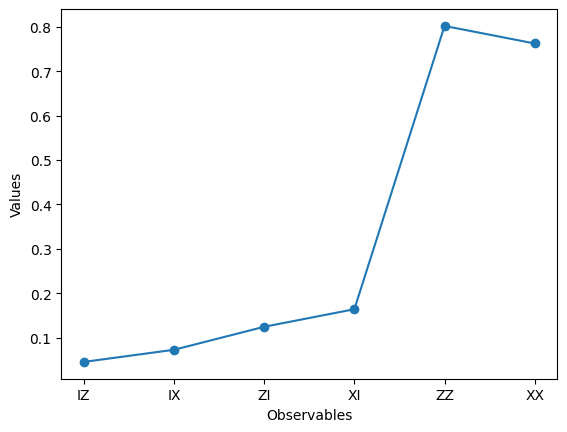

In [5]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

## 10.- Obtenemos los datos con Sampler

Antes lo hicimos con Estimator. 

Veamos como se hace con Sampler.

https://quantum.cloud.ibm.com/docs/es/guides/get-started-with-primitives#get-started-with-sampler

### 10.1.- Conexión con el servicio de IBM Quantum Runtime

Dado que Qiskit Runtime Sampler es un servicio administrado, primero debe inicializar su cuenta. 

A continuación, podremos seleccionar la QPU que desea usar para calcular el valor esperado.

**Para realizar esta prueba, deberíamos reiniciar el kernel y empezar a ejecutar desde 10.1**

In [ ]:
# Invocamos el servicio de IBM Quantum Runtime para seleccionar el backend más adecuado.
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Nos conectamos al servicio de IBM Quantum Runtime con las credenciales guardadas al comienzo de 
# este cuaderno.
service = QiskitRuntimeService()

# Seleccionamos el backend más adecuado para ejecutar nuestro circuito.
# El método least_busy busca el backend menos ocupado que esté operativo y no sea un simulador.
# Esto es útil para asegurarnos de que nuestro trabajo se ejecute lo más rápido posible.
# operational=True indica que solo consideramos backends que están operativos.
# simulator=False indica que no queremos un simulador, sino un backend real.
# min_num_qubits=127 indica que queremos un backend con al menos 127 qubits
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=127
)

### 10.2.- Creamos un circuito

In [2]:
import numpy as np
# efficient_su2 es una función que genera un circuito cuántico parametrizado
# utilizando la descomposición Efficient SU(2). Esta descomposición es útil para crear
# circuitos cuánticos que pueden representar cualquier operación unitaria en un espacio de Hilbert
# de dimensión 2^n, donde n es el número de qubits. La función efficient_su2 toma como argumento 
# el número de qubits # y el tipo de entrelazamiento que se desea utilizar (en este caso, "linear").
# Esto significa que los qubits estarán entrelazados de manera lineal, es decir, cada qubit estará 
# conectado al siguiente en una cadena.
from qiskit.circuit.library import efficient_su2

# efficient_su2 genera un circuito cuántico parametrizado con 127 qubits y entrelazamiento lineal.
# Este circuito es útil para realizar cálculos cuánticos complejos y se puede utilizar
# para estimar valores esperados de operadores cuánticos.
circuit = efficient_su2(127, entanglement="linear")

# measure_all() es un método que agrega mediciones a todos los qubits del circuito.
# Esto es necesario para obtener resultados de las mediciones realizadas en el circuito cuántico.
# Las mediciones son fundamentales en la computación cuántica, ya que nos permiten obtener
# información sobre el estado cuántico del sistema y realizar inferencias sobre los resultados.
circuit.measure_all()

# El circuito es un circuito cuántico parametrizado, lo que significa que contiene parámetros
# que pueden ser ajustados para modificar el comportamiento del circuito.
# num_parameters es un atributo que devuelve el número de parámetros en el circuito.
# En este caso, el circuito tiene 127 parámetros, lo que significa que hay 127
# valores que se pueden ajustar para modificar el circuito.
# Estos parámetros son importantes para la optimización y ajuste del circuito
# para adaptarlo a diferentes tareas y objetivos en la computación cuántica.   

param_values = np.random.rand(circuit.num_parameters)

### 10.3.- Usamos un transpiler para obtener un circuito ISA


In [3]:
from qiskit.transpiler import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)
print(f">>> Circuit ops (ISA): {isa_circuit.count_ops()}")

>>> Circuit ops (ISA): OrderedDict({'rz': 3647, 'sx': 2061, 'ecr': 579, 'measure': 127, 'x': 14, 'barrier': 1})


### 10.4.- Inicializamos el muestreador de tiempo de ejecución de Qiskit

Al inicializar el Sampler, utilizamos el parámetro de modo para especificar el modo de ejecución. 

Los valores posibles son lote, sesión u objetos de backend para los modos de ejecución de lote, 
sesión y trabajo, respectivamente. 

Para obtener más información, consulte Introducción a los modos de ejecución de Qiskit Runtime. 
Tenga en cuenta que los usuarios de Open Plan no pueden enviar trabajos de sesión.

https://quantum.cloud.ibm.com/docs/es/guides/execution-modes

In [4]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
 
sampler = Sampler(mode=backend)

### 4._ Invocar el Sampler y obtener los resultados.

A continuación, invocamos el método run() para generar la salida. 

El circuito y los conjuntos de valores de los parámetros opcionales se introducen como tuplas de bloques unificados primitivos (PUB).

In [5]:
job = sampler.run([(isa_circuit, param_values)])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d2guhkg3omtc738i0j50
>>> Job Status: QUEUED


In [6]:
result = job.result()
 
# Get results for the first (and only) PUB
pub_result = result[0]
print(
    f"First ten results for the 'meas' output register: {pub_result.data.meas.get_bitstrings()[:10]}"
)

First ten results for the 'meas' output register: ['1101110111100000111001011010111101000000100010000110100100110100110101110101111101000101001111101011110110100111100100001011110', '1011101010100000011000100010111010001110000110001001001111010000110111011001111001110101000011001100110011010100101000111101110', '0101011111000111011101100001000100101111111001110101000000010010000111011100011100011111101110010110110011101111110000111110101', '0101011001010000010000100011111111110010100010001001101001110010000111111100100001001000001001111110101001101110111000110011110', '1010000000010101011100111001101011000110110010101111010000111111000111011011110001001000001010011110111110110010101110100001111', '1000011001011111110110001110110010111111111101110000101001111011100101010011010100100101110000111010000100100110111101111011100', '1001101000101011001111110000110001110111001010110010011100111100110001000001010101001010111010100111011101010011010000011111101', '0100111100100111111011110011001